In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prets = pd.read_csv("../files/prets.csv")
prets.head(3)

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173


In [3]:
groupPret = prets.groupby(prets['ville'])['remboursement'].sum()
groupPret

ville
BORDEAUX     15330.59
LYON         26064.67
MARSEILLE    40895.72
NICE         23544.24
PARIS        94052.61
TOULOUSE     19286.18
Name: remboursement, dtype: float64

In [4]:
groupPret = groupPret.reset_index()
groupPret

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61
5,TOULOUSE,19286.18


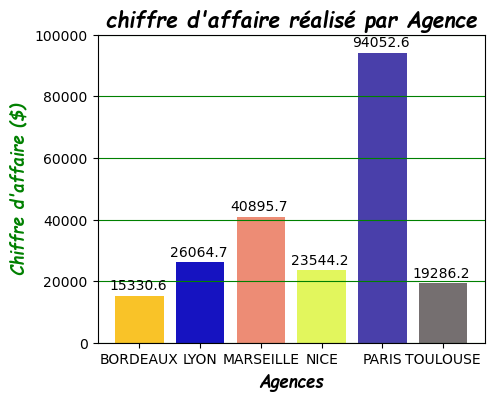

In [166]:
taille=len(groupPret)
# max = max(groupPret['remboursement'])
# generation de couleurs auto = np.random.rand(taille, 3)
colors = np.random.rand(taille, 3)
# plt.figure(figsize=(10,8)) Permet de définir la taille du graphe
plt.figure(figsize=(5,4))
plt.bar(x=groupPret['ville'], height=groupPret['remboursement'], color=colors)
plt.xlabel('Agences', fontname="Comic Sans MS", fontsize=12, fontstyle="italic", fontweight=600)
plt.ylabel("Chiffre d'affaire ($)", fontname="Comic Sans MS", fontsize=12, fontstyle="italic", fontweight=600, color="green")
plt.title("chiffre d'affaire réalisé par Agence", fontname="Comic Sans MS", fontsize=15, fontstyle="italic", fontweight=600)
# plt.grid() pour ajouter un effet de grille sur le graphe
plt.grid(axis='y', color='green')
# Modifier les graduations avec plt.ylim(0, 120000)
plt.ylim(0, 100000)

# Ajouter les valeurs sur chaque bar
ca = groupPret['remboursement'].tolist()
for i in range(taille):
    plt.text(i-0.5, ca[i]+2000, round(ca[i], 1), fontsize=10)
plt.show()

In [168]:
CA = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/CA.csv')
CA['date'] = pd.to_datetime(CA['date'])
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


## Pour expliciter rapidement les différents aspects qui avaient été réalisés :
- 
la fenêtre graphique est de dimension 10x- 7
une courbe a été tracée pour chaque type de prêt, de dimension 3
la légende est appare-nte
le titre de l'axe des ordonnées a été aj-outé
la police des graduations (ticks) a été fixée- à 11
la police du titre a été fixé-e à 14
le quadrillage apparait en gris, avec une taill e de 0.5

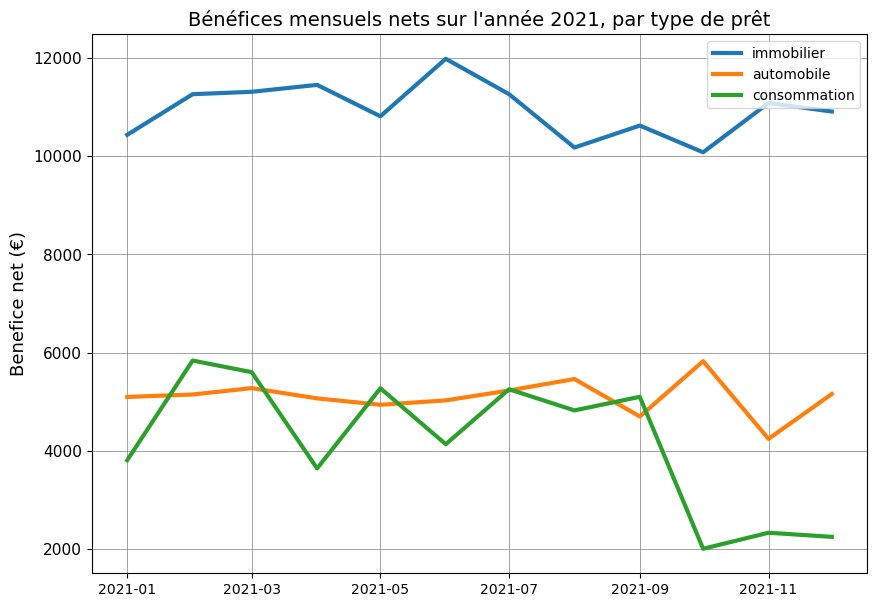

In [178]:
plt.figure(figsize=(10, 7))
plt.plot(CA['date'], CA['immobilier'], label='immobilier', linewidth=3)
plt.plot(CA['date'], CA['automobile'], label='automobile', linewidth=3)
plt.plot(CA['date'], CA['consommation'], label='consommation', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Benefice net (€)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Bénéfices mensuels nets sur l'année 2021, par type de prêt", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [182]:
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


<Axes: xlabel='revenu', ylabel='taux'>

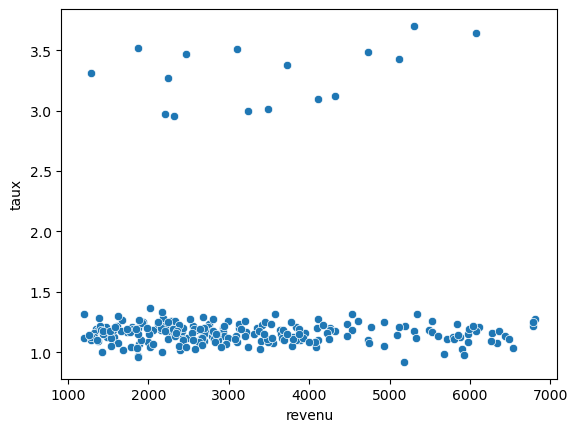

In [184]:
import seaborn as sns
sns.scatterplot(data=prets, x='revenu', y='taux')

<Axes: xlabel='revenu', ylabel='taux'>

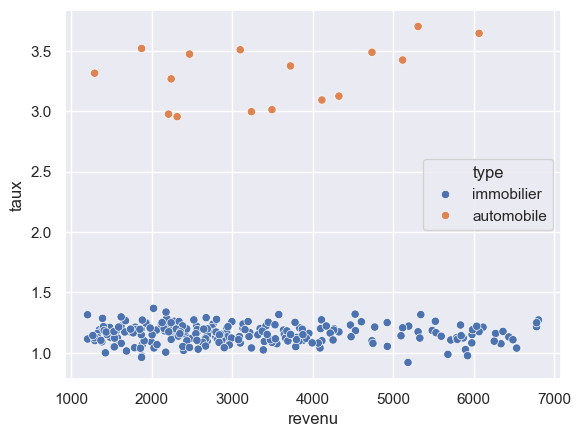

In [206]:
sns.scatterplot(data=prets, x='revenu', y='taux', hue='type')

<Axes: xlabel='revenu', ylabel='taux'>

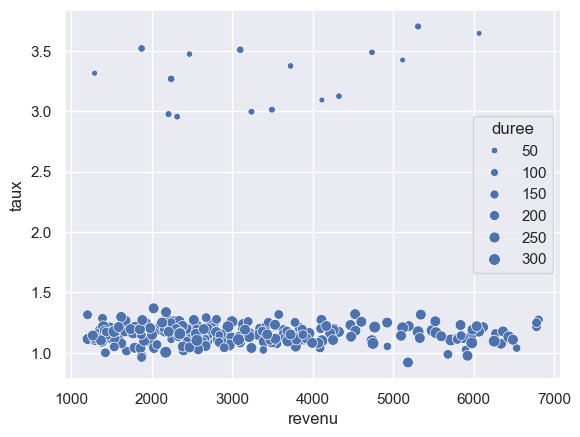

In [210]:
sns.scatterplot(data=prets, x='revenu', y='taux', size='duree')

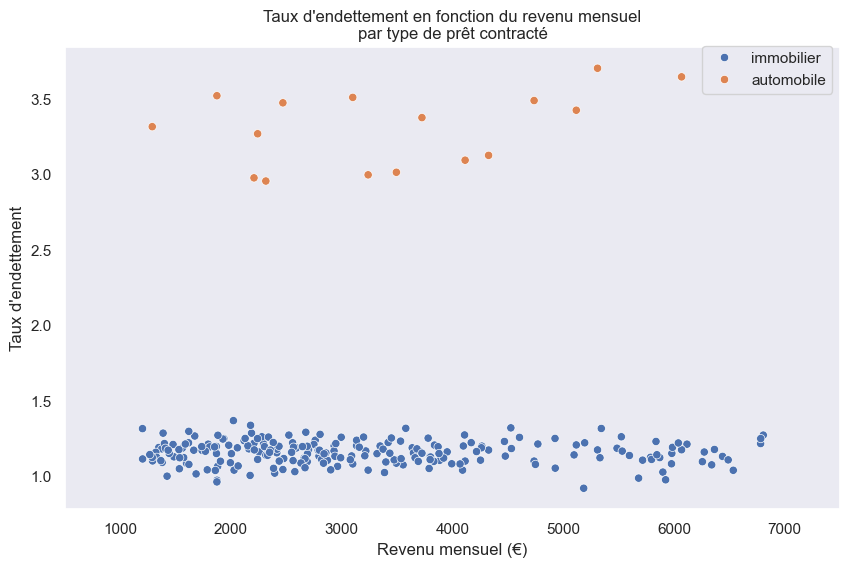

In [214]:
plt.figure(figsize=(10,6))

plt.rcParams.update({'font.size': 14})
# La fonctionrcParams.update , avec l’argumentfont.size , définit pour tous les graphiques 
# – et non pas uniquement le graphique actuel – la taille de la police de tous les éléments (xlabel, title, legend, etc.) à 14
sns.scatterplot(data=prets, x='revenu', y='taux', hue='type')

plt.ylabel("Taux d'endettement")

plt.xlabel('Revenu mensuel (€)')

plt.grid()

plt.xlim(500, 7500)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Taux d'endettement en fonction du revenu mensuel\npar type de prêt contracté")

plt.show()

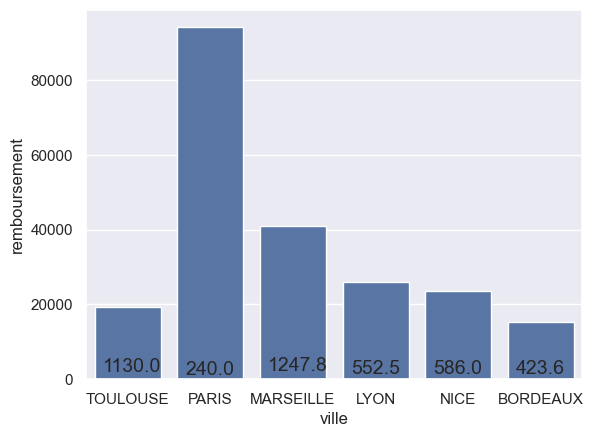

In [238]:
sns.barplot(data=prets, x='ville', y='remboursement', errorbar=None, estimator=sum)
for i in range(6):
    plt.text(i-0.3, prets['remboursement'][i]+1000, round(prets['remboursement'][i], 1))

<Axes: xlabel='ville', ylabel='remboursement'>

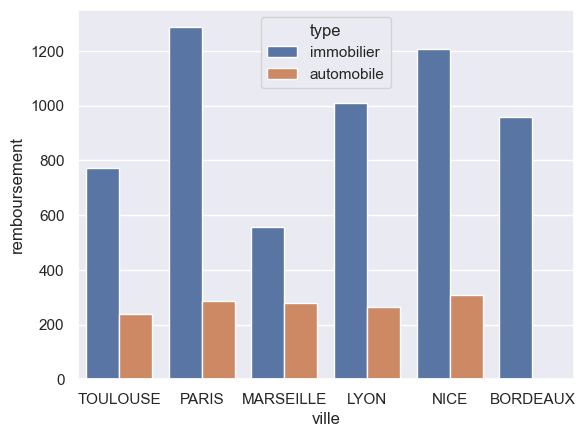

In [242]:
sns.barplot(data=prets, x='ville', y='remboursement', errorbar=None, estimator=np.mean, hue='type')

In [244]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

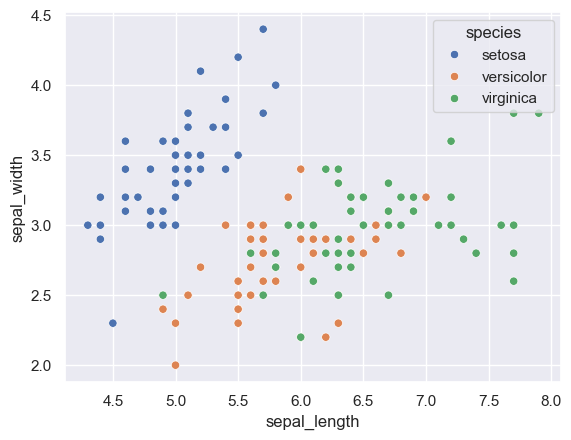

In [246]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='species', ylabel='petal_width'>

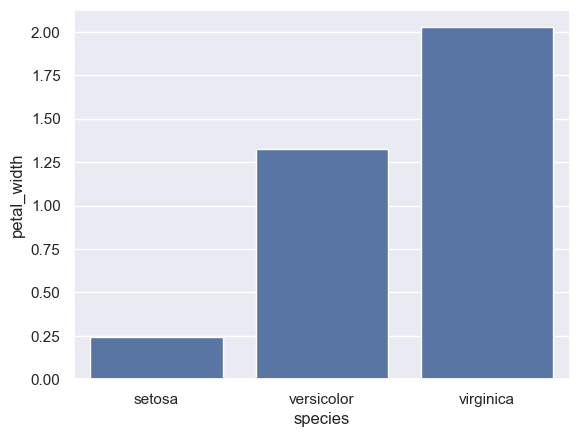

In [252]:
sns.barplot(data=iris, x='species', y='petal_width', errorbar=None, estimator=np.mean)

In [262]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
